# Building word-vector representations with word2vec

## Explore word2vec using a very small text

In [1]:
import gensim
import en_core_web_md

In [2]:
# Prepare our text
text = ["Homer lives in a modest home in the suburbs .",
        "Homer lives with his wife Marge and his children .",
        "Homer loves beer .",
        "Homer works a factory job .",
        "Homer loves his wife and his children .",
        "Homer loves Marge and children .",
        "Homer loves Marge .",
        "Homer drinks beer .",
        "Homer loves to grill ."]
sentences = [sentence.split() for sentence in text]

### Initialize the model:
* *size* - size of the vector (default = 100)
* *window* - size of the context (default = 5)
* *min_count* - the minimum word frequency (default = 5)
* *iter* - number of iterations (default = 5)
* *sample* – threshold for configuring which higher-frequency words are randomly downsampled (default = 0.001, useful range is (0, 1e-5))
* *sg* - algorithm; if 1, skip-gram is employed; otherwise, CBOW (default = 0)

See more at https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

In [3]:
simple_model = gensim.models.Word2Vec(size=10, window=3, min_count=1, iter=100)

In [4]:
# Build the vocabulary
simple_model.build_vocab(sentences)
print("The vocabulary contains {} tokens:".format(len(simple_model.wv.vocab)))
print(", ".join(simple_model.wv.vocab))

The vocabulary contains 23 tokens:
Homer, lives, in, a, modest, home, the, suburbs, ., with, his, wife, Marge, and, children, loves, beer, works, factory, job, drinks, to, grill


In [5]:
# Train the model
simple_model.train(sentences, total_examples=simple_model.corpus_count, epochs=simple_model.epochs)

(919, 5700)

In [6]:
simple_model.wv["Homer"]

array([-0.01457807, -0.02688933, -0.00825159, -0.03283849, -0.03954028,
       -0.04387942,  0.03364788,  0.00306001,  0.04000552,  0.02014847],
      dtype=float32)

In [7]:
simple_model.wv.most_similar(positive=["beer"], topn=5)

[('his', 0.6855198740959167),
 ('job', 0.6089805960655212),
 ('Homer', 0.4203595817089081),
 ('works', 0.4064020812511444),
 ('Marge', 0.35335204005241394)]

In [8]:
simple_model.wv.most_similar(positive=["Marge"], topn=5)

[('children', 0.7555125951766968),
 ('loves', 0.6118846535682678),
 ('to', 0.6085261106491089),
 ('wife', 0.4653707444667816),
 ('factory', 0.44557395577430725)]

In [32]:
simple_model.wv.most_similar(positive=["Marge"], negative=["job"], topn=5)

[('wife', 0.6681273579597473),
 ('children', 0.610073447227478),
 ('loves', 0.5734997391700745),
 ('home', 0.4732385575771332),
 ('.', 0.41256240010261536)]

In [30]:
simple_model.wv.most_similar(positive=["Marge", "children"], topn=5)

[('loves', 0.622331976890564),
 ('to', 0.5720157027244568),
 ('modest', 0.5595673322677612),
 ('factory', 0.5169535875320435),
 ('.', 0.5089230537414551)]

In [33]:
simple_model.wv.doesnt_match(["beer", "wife", "Marge"])

'beer'

In [34]:
simple_model.wv.similarity("wife", "Marge")

0.4653707304517156

In [35]:
simple_model.wv.similarity("loves", "lives")

0.3174228330138831

In [17]:
# We can try detecting multi-word expressions too
bigram_transformer = gensim.models.Phrases(sentences)
for i in sorted(bigram_transformer.vocab.items(), key=lambda x: x[1], reverse=True):
    if i[1] > 1:
        print(i)

(b'Homer', 9)
(b'.', 9)
(b'loves', 5)
(b'Homer_loves', 5)
(b'his', 4)
(b'Marge', 3)
(b'and', 3)
(b'children', 3)
(b'children_.', 3)
(b'lives', 2)
(b'Homer_lives', 2)
(b'in', 2)
(b'a', 2)
(b'wife', 2)
(b'his_wife', 2)
(b'Marge_and', 2)
(b'and_his', 2)
(b'his_children', 2)
(b'beer', 2)
(b'beer_.', 2)
(b'loves_Marge', 2)


See more at https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec.

## Explore word2vec on a larger text

In [18]:
nlp = en_core_web_md.load()

In [21]:
class MyText(object):
    def __init__(self, filename):
        self.filename = filename
    
    def __iter__(self):
        with open(self.filename, "r") as f:
            text = nlp(f.read())
            for sentence in text.sents:
                words = ["<S>"]
                for word in sentence:
                    if word.pos_ != "SPACE":
                        lemma = word.lemma_
                        if lemma == "-PRON-":
                            lemma = word.text.lower()
                        pos = word.pos_
                        if pos == "PROPN":
                            pos = "NOUN"
                        words.append(lemma + "_" + pos)
                words.append("</S>")
                if len(words) > 2:
                    yield words

In [22]:
alice = MyText("alice.txt")

In [36]:
model = gensim.models.Word2Vec(alice, size=75, min_count=10, iter=30)
# model = gensim.models.Word2Vec(size=75, min_count=10, iter=30)
# model.build_vocab(alice)
# model.train(alice, total_examples=model.corpus_count, epochs=model.epochs)

In [37]:
print("The vocabulary contains {} tokens.".format(len(model.wv.vocab)))

The vocabulary contains 668 tokens.


In [38]:
model.wv["queen_NOUN"]

array([ 0.11413185,  0.5949863 ,  0.49487814,  0.5742768 , -1.0822297 ,
       -0.02153508,  0.48581457, -0.71189874,  2.2513523 , -0.0772558 ,
       -0.08615175,  0.30193847,  0.3162758 , -2.6292167 , -0.19756871,
       -0.8341728 , -0.66789365, -0.23562734,  0.04346377,  1.25502   ,
       -0.96912   , -0.8927309 , -0.0882756 , -1.0984857 , -0.6692846 ,
       -0.5493002 ,  1.1952738 , -0.35345873,  1.7447567 ,  0.34245366,
       -0.4555024 ,  0.30958712, -0.5876762 ,  0.46231976,  0.5932624 ,
        0.7631199 ,  1.523663  , -0.39136896, -0.14941442, -0.7581803 ,
        1.2540447 ,  0.71262   ,  0.02885384,  2.0752213 , -0.3627157 ,
       -0.6159076 , -1.1462373 ,  0.84264815,  2.0659876 , -0.49066183,
        0.22708146,  1.329406  ,  0.12656336,  1.4548057 , -0.87437177,
        0.27867097,  1.8750645 ,  1.0129884 , -0.32941452, -0.5606945 ,
        0.4193016 , -0.8982725 , -0.35410503, -1.5410829 , -0.38870347,
       -0.6902184 , -1.4409807 , -0.5451168 , -1.8176272 , -0.77

In [39]:
model.wv.most_similar(positive=["queen_NOUN"], topn=15)

[('king_NOUN', 0.8195973634719849),
 ('rabbit_NOUN', 0.7940890789031982),
 ('knight_NOUN', 0.7650502920150757),
 ('rose_NOUN', 0.6606079936027527),
 ('sheep_NOUN', 0.6368069648742676),
 ('gryphon_NOUN', 0.6276119351387024),
 ('lion_NOUN', 0.6246041655540466),
 ('unicorn_NOUN', 0.6139159202575684),
 ('hatter_NOUN', 0.5785979628562927),
 ('duchess_NOUN', 0.5742928981781006),
 ('dormouse_NOUN', 0.5626205801963806),
 ('kitten_NOUN', 0.5557862520217896),
 ('caterpillar_NOUN', 0.5460533499717712),
 ('gnat_NOUN', 0.5233383178710938),
 ('dodo_NOUN', 0.5172272324562073)]

In [40]:
model.wv.doesnt_match(["queen_NOUN", "king_NOUN", "duchess_NOUN", "alice_NOUN"])

'alice_NOUN'

In [41]:
model.wv.doesnt_match(["say_VERB", "tell_VERB", "reply_VERB", "go_VERB"])

'go_VERB'

In [42]:
model.wv.most_similar(positive=["head_NOUN"])

[('hair_NOUN', 0.8607650399208069),
 ('shoulder_NOUN', 0.810667097568512),
 ('neck_NOUN', 0.8089621067047119),
 ('hand_NOUN', 0.8060130476951599),
 ('tail_NOUN', 0.8041206002235413),
 ('face_NOUN', 0.8006356358528137),
 ('mouth_NOUN', 0.7944957613945007),
 ('own_ADJ', 0.7834600210189819),
 ('paw_NOUN', 0.7756462097167969),
 ('ear_NOUN', 0.7673256397247314)]

In [43]:
model.wv.most_similar(positive=["oyster_NOUN"])

[('crab_NOUN', 0.8377188444137573),
 ('carpenter_NOUN', 0.7569010257720947),
 ('present_NOUN', 0.7338333129882812),
 ('old_ADJ', 0.7285784482955933),
 ('seven_NUM', 0.7272090315818787),
 ('soup_NOUN', 0.7241595387458801),
 ('walrus_NOUN', 0.7061634063720703),
 ('man_NOUN', 0.7022372484207153),
 ('dinner_NOUN', 0.7014530897140503),
 ('night_NOUN', 0.6954205632209778)]

In [44]:
model.wv.most_similar(positive=["alice_NOUN"])

[('she_PRON', 0.6610369086265564),
 ('afterwards_ADV', 0.6138221025466919),
 ('herself_PRON', 0.5516687631607056),
 ('puzzled_ADJ', 0.546956479549408),
 ('much_ADV', 0.5182530879974365),
 ('question_NOUN', 0.505143404006958),
 ('timidly_ADV', 0.49763089418411255),
 ('politely_ADV', 0.4887434244155884),
 ('dormouse_NOUN', 0.4806196391582489),
 ('knight_NOUN', 0.46858036518096924)]

In [45]:
model.wv.most_similar(positive=["go_VERB"])

[('put_VERB', 0.6499727368354797),
 ('come_VERB', 0.6376410722732544),
 ('keep_VERB', 0.6284362077713013),
 ('walk_VERB', 0.6099972724914551),
 ('move_VERB', 0.5888571739196777),
 ('send_VERB', 0.5882790684700012),
 ('get_VERB', 0.5447977185249329),
 ('turn_VERB', 0.5364412069320679),
 ('pass_VERB', 0.5315772891044617),
 ('settle_VERB', 0.520257294178009)]

In [46]:
model.wv.most_similar(positive=["say_VERB"])

[('remark_VERB', 0.7727510929107666),
 ('reply_VERB', 0.7562205195426941),
 ('add_VERB', 0.719392716884613),
 ('repeat_VERB', 0.6001617908477783),
 ('interrupt_VERB', 0.5917848944664001),
 ('answer_VERB', 0.5445111989974976),
 ('whisper_VERB', 0.5423060059547424),
 ('think_VERB', 0.5071455240249634),
 ('explain_VERB', 0.5045211911201477),
 ('exclaim_VERB', 0.5042113065719604)]

In [47]:
model.wv.most_similar(positive=["red_NOUN"])

[('white_NOUN', 0.823891282081604),
 ('scream_VERB', 0.618787407875061),
 ('remark_VERB', 0.6065846085548401),
 ('angrily_ADV', 0.6012203097343445),
 ('interrupt_VERB', 0.5686538219451904),
 ('unicorn_NOUN', 0.5209848880767822),
 ('hatter_NOUN', 0.5172007083892822),
 ('who_NOUN', 0.5063095092773438),
 ('hastily_ADV', 0.5001121759414673),
 ('rose_NOUN', 0.4956131875514984)]

In [48]:
model.wv.most_similar(positive=["little_ADJ"])

[('sudden_ADJ', 0.6625736951828003),
 ('long_ADJ', 0.6109942197799683),
 ('tree_NOUN', 0.6106938123703003),
 ('yard_NOUN', 0.5962684154510498),
 ('bottle_NOUN', 0.5749298334121704),
 ('pair_NOUN', 0.5558291673660278),
 ('quite_ADJ', 0.5445135831832886),
 ('large_ADJ', 0.530839741230011),
 ('voice_NOUN', 0.5159767866134644),
 ('bit_NOUN', 0.5130465030670166)]

In [49]:
model.wv.most_similar(positive=["small_ADJ"])

[('large_ADJ', 0.7293568849563599),
 ('grow_VERB', 0.6957991719245911),
 ('quite_ADV', 0.6751863956451416),
 ('few_ADJ', 0.6600274443626404),
 ('pleased_ADJ', 0.6586658358573914),
 ('idea_NOUN', 0.6539437770843506),
 ('about_ADV', 0.6469759345054626),
 ('listen_VERB', 0.6413574814796448),
 ('flower_NOUN', 0.6317957043647766),
 ('fan_NOUN', 0.6213661432266235)]

In [50]:
model.wv.most_similar(positive=["queen_NOUN"], negative=["red_NOUN"])

[('kitten_NOUN', 0.39184796810150146),
 ('soldier_NOUN', 0.38951411843299866),
 ('them_PRON', 0.3883768916130066),
 ('tear_NOUN', 0.3719978928565979),
 ('king_NOUN', 0.3448095917701721),
 ('breath_NOUN', 0.34395867586135864),
 ('one_NOUN', 0.34117400646209717),
 ('rabbit_NOUN', 0.33938711881637573),
 ('fire_NOUN', 0.33344006538391113),
 ('neck_NOUN', 0.326082706451416)]

## Let's try some LDA

In [323]:
def get_content_words(text):
    words = []
    text = nlp(text)
    for sentence in text.sents:
        for word in sentence:
            if word.tag_ in ["NN", "NNS"]:
                words.append(word.lemma_)
    return words

with open("alice-1.txt", "r") as f:
    alice_wonderland = get_content_words(f.read())
with open("alice-2.txt", "r") as f:
    alice_looking_glass = get_content_words(f.read())
with open("tangled_tale.txt", "r") as f:
    tangled_tale = get_content_words(f.read())

print(alice_wonderland[10:15])
print(len(alice_wonderland))
print(alice_looking_glass[10:15])
print(len(alice_looking_glass))
print(tangled_tale[10:15])
print(len(tangled_tale))

['picture', 'conversation', 'use', 'book', 'picture']
3570
['face', 'cat', 'quarter', 'hour', 'hand']
4059
['bounding', 'crag', 'agility', 'fawn', 'companion']
2200


In [324]:
dictionary = gensim.corpora.Dictionary([alice_wonderland, alice_looking_glass, tangled_tale])
corpus = [dictionary.doc2bow(alice_wonderland),
          dictionary.doc2bow(alice_looking_glass),
          dictionary.doc2bow(tangled_tale)]

In [325]:
# Corpus is a list of vectors for documents. The tuples are (term ID, term frequency) pairs.
print(corpus[0][:20])
print(len(corpus[0]), len(corpus[1]), len(corpus[2]))

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 5), (12, 1), (13, 1), (14, 1), (15, 4), (16, 1), (17, 16), (18, 2), (19, 2)]
856 946 829


In [326]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=20)

In [327]:
lda.print_topics(num_words=5)

[(0, '0.013*"man" + 0.008*"day" + 0.008*"lady" + 0.008*"room" + 0.008*"aunt"'),
 (1,
  '0.019*"thing" + 0.019*"time" + 0.015*"way" + 0.015*"head" + 0.012*"hand"')]

In [334]:
lda.get_term_topics("rose", minimum_probability=1e-7)

[(0, 4.6038855e-05), (1, 0.00070622)]

In [335]:
lda.get_term_topics("bush", minimum_probability=1e-7)

[(0, 4.5719455e-05), (1, 0.00023752295)]

In [341]:
lda.get_term_topics("liquid", minimum_probability=1e-7)

[(0, 0.0042249565), (1, 1.679964e-05)]

In [339]:
lda.get_term_topics("time", minimum_probability=1e-7)

[(0, 0.006183312), (1, 0.018578794)]

### Attempt # 2

In [264]:
alice_words = get_content_words("""
'Get to your places!' shouted the Queen in a voice of thunder, and people began running about in all directions, tumbling up against each other; however, they got settled down in a minute or two, and the game began. Alice thought she had never seen such a curious croquet-ground in her life; it was all ridges and furrows; the balls were live hedgehogs, the mallets live flamingoes, and the soldiers had to double themselves up and to stand on their hands and feet, to make the arches.
The chief difficulty Alice found at first was in managing her flamingo: she succeeded in getting its body tucked away, comfortably enough, under her arm, with its legs hanging down, but generally, just as she had got its neck nicely straightened out, and was going to give the hedgehog a blow with its head, it WOULD twist itself round and look up in her face, with such a puzzled expression that she could not help bursting out laughing: and when she had got its head down, and was going to begin again, it was very provoking to find that the hedgehog had unrolled itself, and was in the act of crawling away: besides all this, there was generally a ridge or furrow in the way wherever she wanted to send the hedgehog to, and, as the doubled-up soldiers were always getting up and walking off to other parts of the ground, Alice soon came to the conclusion that it was a very difficult game indeed.
The players all played at once without waiting for turns, quarrelling all the while, and fighting for the hedgehogs; and in a very short time the Queen was in a furious passion, and went stamping about, and shouting 'Off with his head!' or 'Off with her head!' about once in a minute.""")

tangled_tale_words = get_content_words("""
When a solid is immersed in a liquid, it is well known that it displaces a portion of the liquid equal to itself in bulk, and that the level of the liquid rises just so much as it would rise if a quantity of liquid had been added to it, equal in bulk to the solid. Lardner says, precisely the same process occurs when a solid is partially immersed: the quantity of liquid displaced, in this case, equalling the portion of the solid which is immersed, and the rise of the level being in proportion.
Suppose a solid held above the surface of a liquid and partially immersed: a portion of the liquid is displaced, and the level of the liquid rises. But, by this rise of level, a little bit more of the solid is of course immersed, and so there is a new displacement of a second portion of the liquid, and a consequent rise of level. Again, this second rise of level causes a yet further immersion, and by consequence another displacement of liquid and another rise. It is self-evident that this process must continue till the entire solid is immersed, and that the liquid will then begin to immerse whatever holds the solid, which, being connected with it, must for the time be considered a part of it. If you hold a stick, six feet long, with its end in a tumbler of water, and wait long enough, you must eventually be immersed. The question as to the source from which the water is supplied - which belongs to a high branch of mathematics, and is therefore beyond our present scope - does not apply to the sea. Let us therefore take the familiar instance of a man standing at the edge of the sea, at ebb-tide, with a solid in his hand, which he partially immerses: he remains steadfast and unmoved, and we all know that he must be drowned. The multitudes who daily perish in this manner to attest a philosophical truth, and whose bodies the unreasoning wave casts sullenly upon our thankless shores, have a truer claim to be called the martyrs of science than a Galileo or a Kepler. To use Kossuth's eloquent phrase, they are the unnamed demigods of the nineteenth century.""")

In [265]:
print(alice_words[0:10])
print(len(alice_words))
print(tangled_tale_words[0:10])
print(len(tangled_tale_words))

['place', 'queen', 'voice', 'thunder', 'people', 'direction', 'minute', 'game', 'croquet', 'ground']
54
['solid', 'liquid', 'portion', 'liquid', 'bulk', 'level', 'liquid', 'quantity', 'liquid', 'bulk']
82


In [266]:
dictionary = gensim.corpora.Dictionary([alice_words, tangled_tale_words])
corpus = [dictionary.doc2bow(alice_words), dictionary.doc2bow(tangled_tale_words)]

In [289]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=10)

In [290]:
lda.print_topics(num_words=5)

[(0,
  '0.058*"hedgehog" + 0.047*"head" + 0.026*"ground" + 0.026*"flamingo" + 0.026*"furrow"'),
 (1,
  '0.093*"liquid" + 0.053*"level" + 0.053*"rise" + 0.044*"solid" + 0.036*"portion"')]

In [291]:
new_text = "I like hedgehogs because they are so cute! Little hedgehogs live in the forest."
print(lda[dictionary.doc2bow(get_content_words(new_text))])

new_text = "I like doing chemistry because I get to work with liquids."
print(lda[dictionary.doc2bow(get_content_words(new_text))])

[(0, 0.8322172), (1, 0.16778275)]
[(0, 0.251143), (1, 0.748857)]


In [288]:
for index in range(lda.num_topics):
    print(index, lda.expElogbeta[index][dictionary.token2id["time"]])

0 0.01092342
1 0.008426889


In [298]:
for index in range(lda.num_topics):
    print(index, lda.expElogbeta[index][dictionary.token2id["hedgehog"]])

0 0.052629057
1 0.0012433603


In [301]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def color_words(model, doc):

    # make into bag of words
    doc = model.id2word.doc2bow(doc)
    # get word_topics
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics=True)

    # color-topic matching
    topic_colors = { 1:'red', 0:'blue'}
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(doc)
    
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


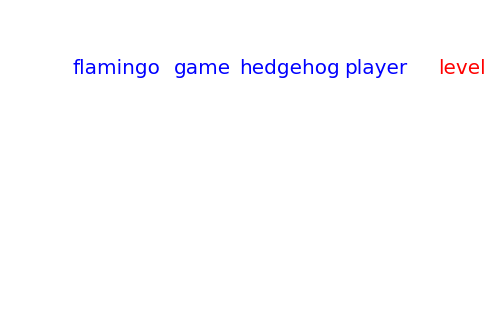

In [310]:
new_text = "Flamingoes play with hedgehogs. Their game is reaching a new level. They are good players."
bow_water = get_content_words(new_text)
color_words(lda, bow_water)

In [219]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)

In [220]:
lda.print_topics()

[(0,
  '0.104*"liquid" + 0.058*"level" + 0.058*"rise" + 0.049*"solid" + 0.040*"portion" + 0.021*"quantity" + 0.021*"bulk" + 0.021*"water" + 0.021*"displacement" + 0.021*"process"'),
 (1,
  '0.013*"liquid" + 0.013*"rise" + 0.013*"solid" + 0.013*"level" + 0.012*"portion" + 0.012*"process" + 0.012*"sea" + 0.012*"displacement" + 0.012*"water" + 0.012*"quantity"'),
 (2,
  '0.066*"hedgehog" + 0.054*"head" + 0.029*"minute" + 0.029*"flamingo" + 0.029*"soldier" + 0.029*"furrow" + 0.029*"ridge" + 0.029*"queen" + 0.029*"game" + 0.029*"ground"')]